# COUNTER ANALYSIS

First we ASSEMBLE it, after that its been LABELED. Then its PACKAGED and these going into a CARTON. At last the Cartons get PALLETIZED   
It goes from Assembly (Harro Hoefliger) to Labeler (Krones) to Packaging (Schubert Verpacker) to Cartoner (Pester Umverpacker) to Palletizer (Pester)


|IP_TAG Name   |Machine|German|Description|Alarm File location|
|--------------|-------|------|-------------|-------------------| 
|36630901_CNTRB|Assembly|Montage|pens rejected between Assembly and Labeler|Y:\E00_Solostar\E6_Assembly_Line_6\E63_Montage\CSV|   


In [16]:
import configparser

Config = configparser.ConfigParser()

Config.read('settings.cfg')

def ConfigSectionMap(section):
    dict1 = {}
    options = Config.options(section)
    for option in options:
        try:
            dict1[option] = Config.get(section, option)
            if dict1[option] == -1:
                DebugPrint("skip: %s" % option)
        except:
            print("exception on %s!" % option)
            dict1[option] = None
    return dict1



dir_sanofi_share = ConfigSectionMap("SectionOne")['sanofi']
dir_local = ConfigSectionMap("SectionOne")['local']

print ("dir_sanofi_share is %s" % (dir_sanofi_share))
print ("dir_local is %s" % (dir_local))


dir_sanofi_share is C:/Users/mark_/Sanofi/Sanofi x McLaren sharing - General/Frankfurt sprint/SFD/
dir_local is C:/Users/mark_/Documents/McLaren2021/Sanofi/


In [17]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
# read IP21 SPEED files for AL6 packaging machines
folder = 'IP21_data'

Files = []
df = []
df_CNTR = pd.DataFrame()

for filename in os.listdir( dir_sanofi_share + folder ):
    # this will only find files for Assembly and Packaging
    if filename.endswith('36630901_CNTRB.csv'):
        path = os.path.join(dir_sanofi_share, folder, filename)
        print (filename)
        df = pd.read_csv(path)
        df['Filename'] = filename
        df_CNTR = df_CNTR.append(df)



tabIP21Data_36630901_CNTRB.csv


In [19]:
# convert dates to datetime format
df_CNTR['IP_TREND_TIME'] = pd.to_datetime(df_CNTR['IP_TREND_TIME'], format='%d-%b-%y %H:%M:%S.%f')
df_CNTR.set_index('IP_TREND_TIME', inplace=True)


In [20]:
df_CNTR['Machine'] = ''
df_CNTR.loc[df_CNTR['Name'].str.contains('36630901'), 'Machine'] = 'Assembly'
df_CNTR.loc[df_CNTR['Name'].str.contains('36640901'), 'Machine'] = 'Labeler'
df_CNTR.loc[df_CNTR['Name'].str.contains('36650901'), 'Machine'] = 'Packaging'
df_CNTR.loc[df_CNTR['Name'].str.contains('36680901'), 'Machine'] = 'Cartoner'
df_CNTR.loc[df_CNTR['Name'].str.contains('36680902'), 'Machine'] = 'Palletizer'


In [21]:
df_CNTR[df_CNTR.Machine == 'Assembly'].Name.unique()

array(['36630901_CNTRB'], dtype=object)

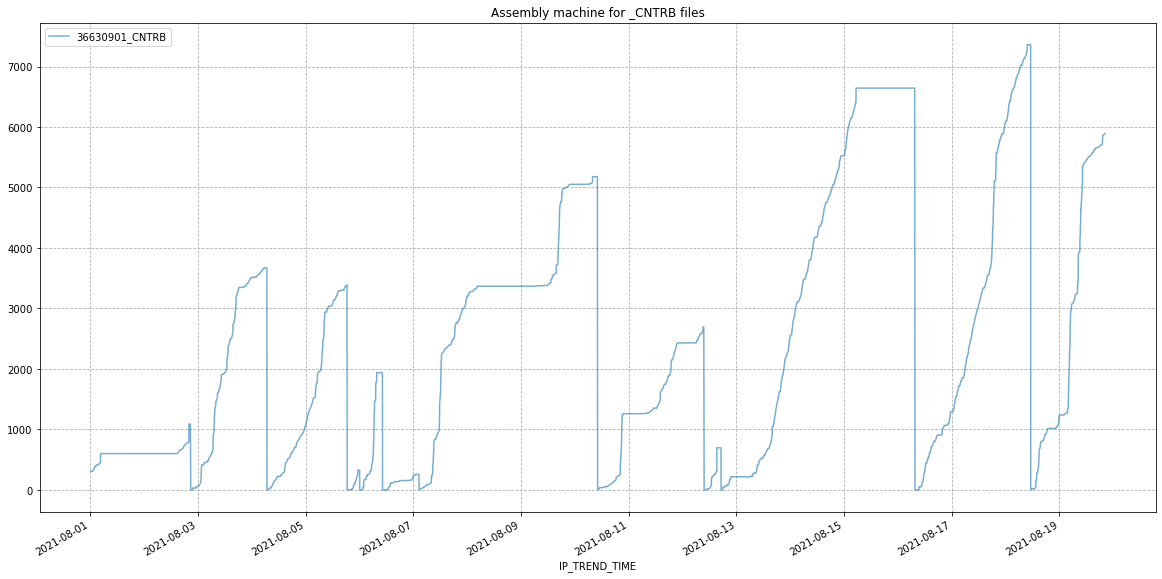

In [25]:
# machines = ['Assembly', 'Labeler', 'Packaging', 'Cartoner', 'Palletizer']

i=0

fig, axs = plt.subplots(1, 1, figsize=(20, 10))

for x in machines:
    name_filter = '_CNTRB'
    names = df_CNTR[(df_CNTR.Name.str.contains(name_filter)) & (df_CNTR.Machine == x)].Name.unique()
    # only get files with a count
    # names = df_CNTR['Name'][df_CNTR.IP_TREND_VALUE > 0].unique()

    for n in names:
        df_CNTR['IP_TREND_VALUE'][df_CNTR.Name == n].plot(label=n, ax=axs, alpha=0.6)
        # plt.yscale('log')
        axs.grid(True,which="both", linestyle='--')
        axs.set_title('{} machine for {} files'.format(x, name_filter))
        axs.legend()

    i+=1

In [26]:
df_CNTR[(df_CNTR.Name.str.contains(name_filter)) & (df_CNTR.Machine == x)].Name.unique()

array([], dtype=object)

In [27]:
machines = ('Assembly')
len(machines)

8

In [28]:
df_CNTR[(df_CNTR.Name.str.contains(name_filter)) & (df_CNTR.Machine == x)].Name.unique()

array([], dtype=object)

In [29]:
df_CNTR['IP_TREND_VALUE'][(df_CNTR.Name == n) & (df_CNTR.IP_TREND_VALUE > 0)]

IP_TREND_TIME
2021-08-19 20:16:29.900    5893
2021-08-19 20:15:14.200    5892
2021-08-19 20:15:09.000    5891
2021-08-19 20:13:22.300    5890
2021-08-19 20:12:07.300    5889
                           ... 
2021-08-01 00:32:53.400     306
2021-08-01 00:32:46.300     305
2021-08-01 00:27:23.000     304
2021-08-01 00:17:23.100     304
2021-08-01 00:07:23.300     304
Name: IP_TREND_VALUE, Length: 25946, dtype: int64